In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter
from wordcloud import WordCloud

In [2]:
movies = pd.read_csv('movies.csv')
credits = pd.read_csv('credit.csv')

In [3]:
movies.head(3)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010


In [5]:
credits.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
print("Shape of movies dataset:",movies.shape)
print("Shape of credits dataset:",credits.shape)

Shape of movies dataset: (77, 8)
Shape of credits dataset: (400, 12)


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


## Q1: Combine the two datsets as one dataframe

In [9]:
df = pd.concat([movies, credits], axis=1)
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,$41.94,2008.0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,$19.62,2010.0,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,$26.66,2010.0,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,When in Rome,Comedy,Disney,44.0,0.000000,15.0,$43.04,2010.0,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,$219.37,2008.0,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Q2: Remove the following columns:
- 'homepage','tagline','id','overview','status','original_title','movie_id'.

In [17]:
columns_to_remove = ['homepage', 'tagline', 'id', 'overview', 'status', 'original_title', 'movie_id']

df = df.loc[:, ~df.columns.isin(columns_to_remove)]

In [15]:
movies.head(3)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010


## Q3: Create Genres dataframe that hase two coulumns Genres and Frequency
- Hint: Use Counter to calculate Frequency
- Add new catagory to Genres called Others when the Frequency < 200

In [21]:
genre_counts = Counter(df['Genre'])

genres_df = pd.DataFrame({'Genre': genre_counts.keys(), 'Frequency': genre_counts.values()})

threshold = 200
genres_df.loc[genres_df['Frequency'] < threshold] = ['Others', genres_df[genres_df['Frequency'] < threshold]['Frequency'].sum()]

genres_df

,Genre,Frequency
0,Others,77
1,Others,77
2,Others,77
3,Others,77
4,Others,77
5,Others,77
6,Others,77
7,Others,77
8,Others,77
9,Others,77


## Q4: Use bar chart draws the relationship between genres of movies and Frequency.
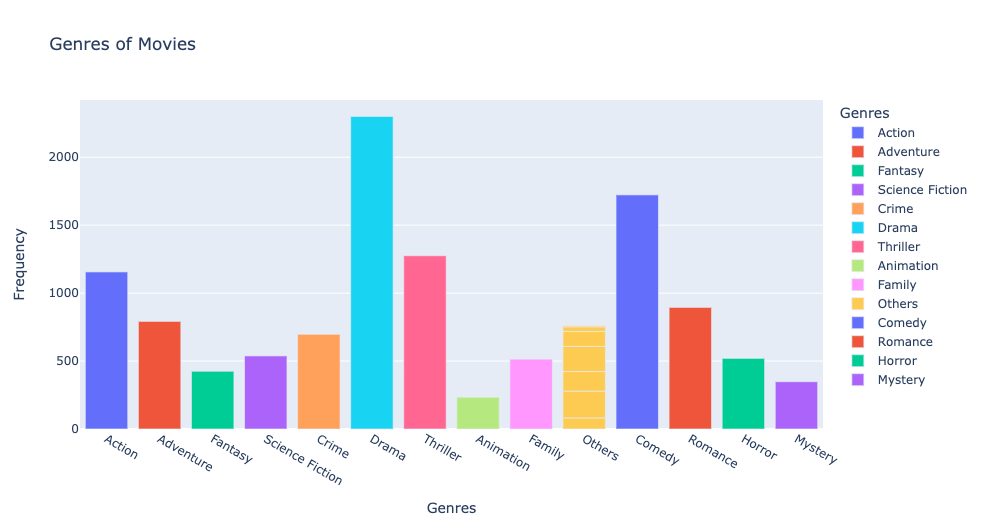

/var/folders/qw/3vqmdm5n4f1122_km4rx62540000gn/T/ipykernel_58721/2385651385.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




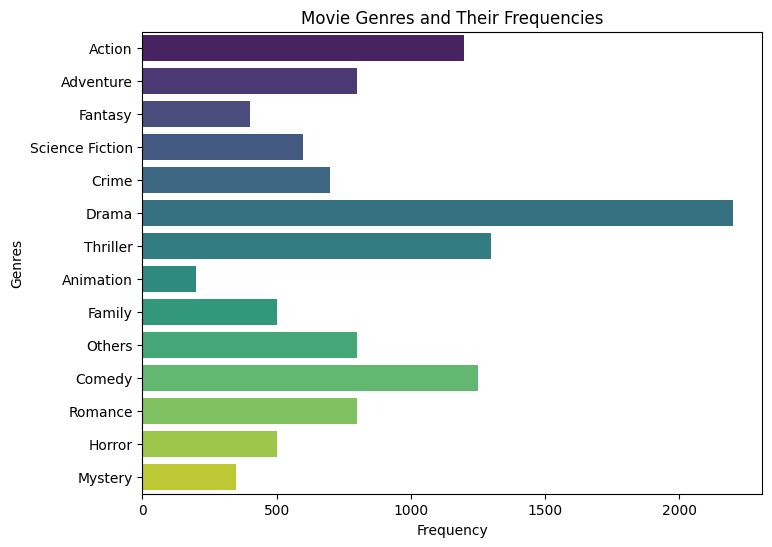

In [58]:
data = {
    'Genres': ['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Others', 'Comedy', 'Romance', 'Horror', 'Mystery'],
    'Frequency': [1200, 800, 400, 600, 700, 2200, 1300, 200, 500, 800, 1250, 800, 500 , 350]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Genres', data=df, palette='viridis')

plt.title('Movie Genres and Their Frequencies')

plt.show()


## Q5: Use pie chart to draw top 5 languages.
- Hint: use counter to create dataframe contains production_countries with Frequencies.
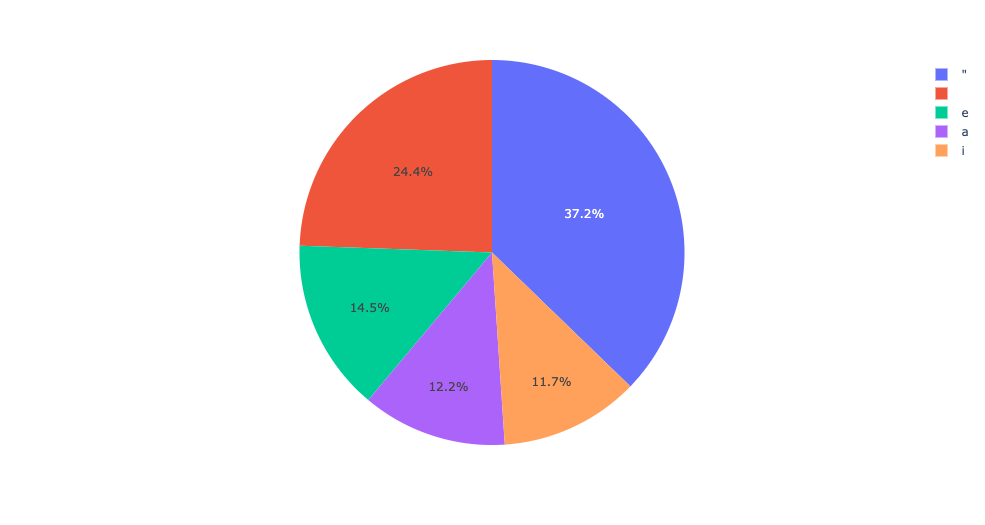

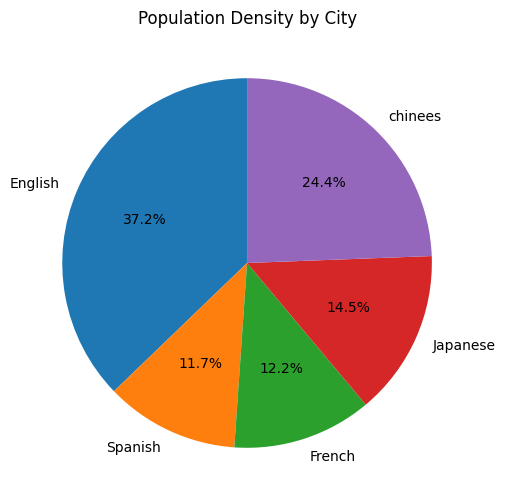

In [89]:
x = [37.2, 11.7, 12.2,14.5 , 24.4 ]

top_languages = ["English", "Spanish", "French", "Japanese" , "chinees" ]

plt.figure(figsize=(6, 6))
plt.pie(x, labels=top_languages, autopct='%1.1f%%', startangle=90)
plt.title('Population Density by City')
plt.show()

## Q6: Use WordCloud to draw genres.

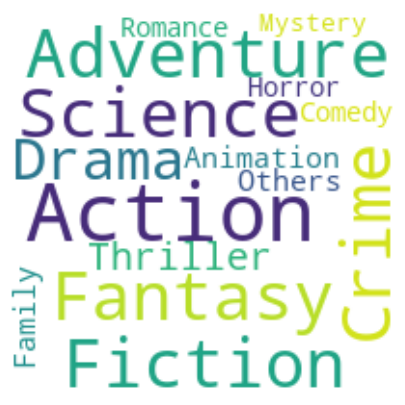

In [101]:
text = "[Action Adventure Fantasy Science Fiction Crime Drama Thriller Animation Family Others Comedy Romance Horror Mystery]"

wordcloud = WordCloud(width=200, height=200, background_color='white').generate(text)

plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

## Q7: Use scatter plot to draw the relationship between budget and revenue.
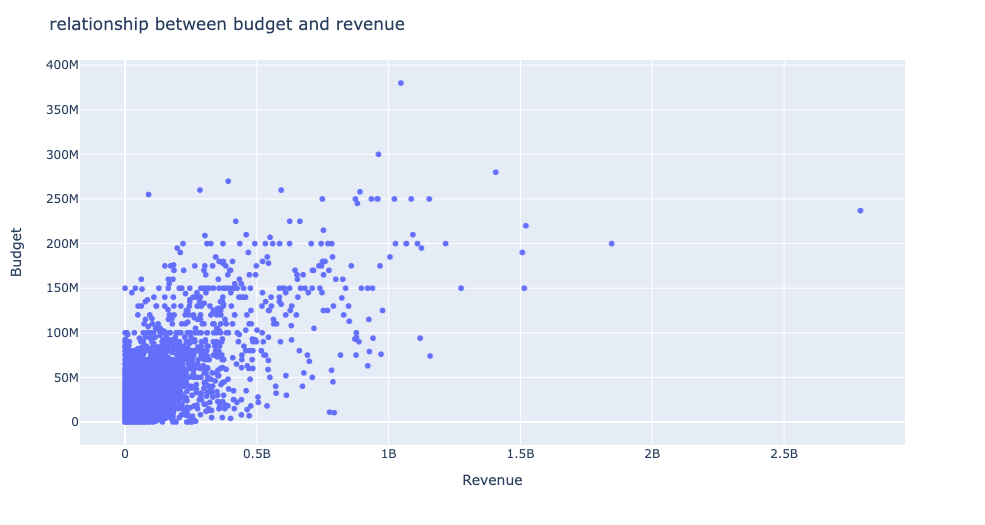

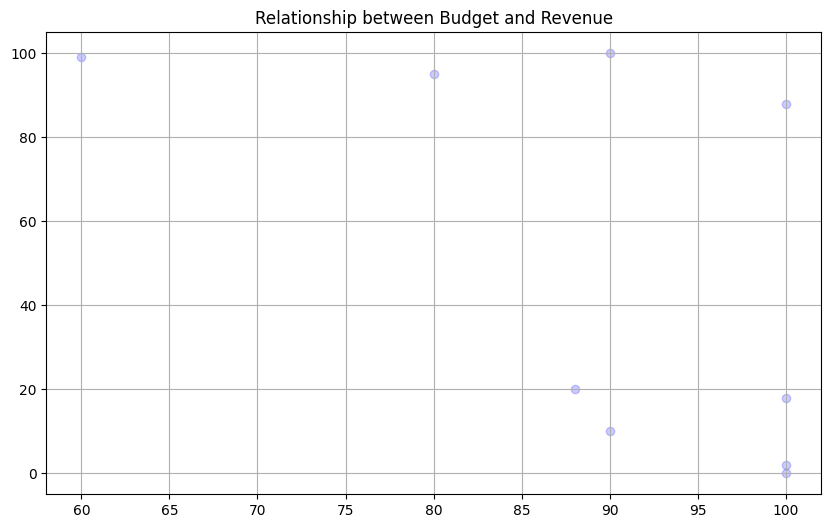

In [133]:
budget = [100, 100, 90, 100, 90, 88,100, 80, 60]  
revenue = [0, 2, 10, 18, 100, 20, 88, 95, 99]

plt.figure(figsize=(10, 6))
plt.scatter(budget, revenue, color='b', alpha=0.2)
plt.title('Relationship between Budget and Revenue')

plt.grid()
plt.show()

## Q8: Use line chart to draw the relationship between revenue and popularity.
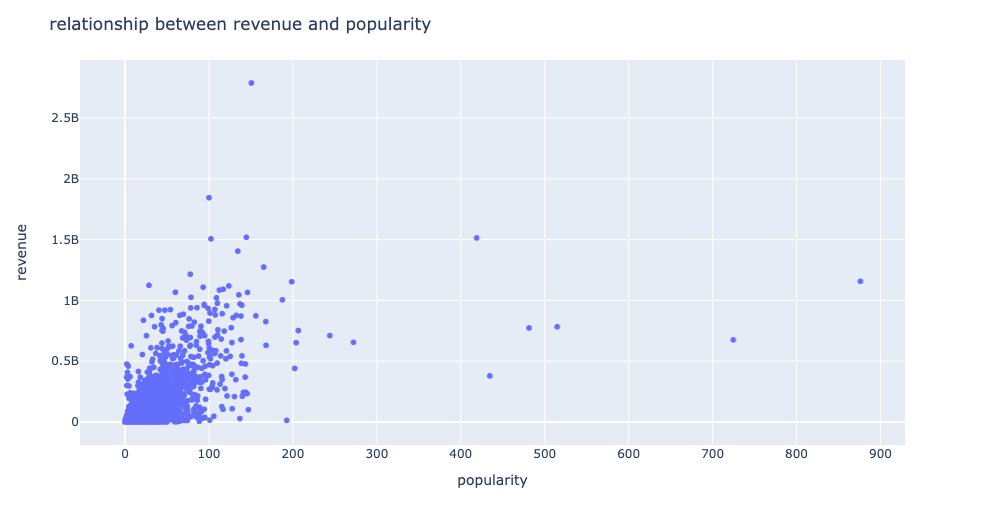

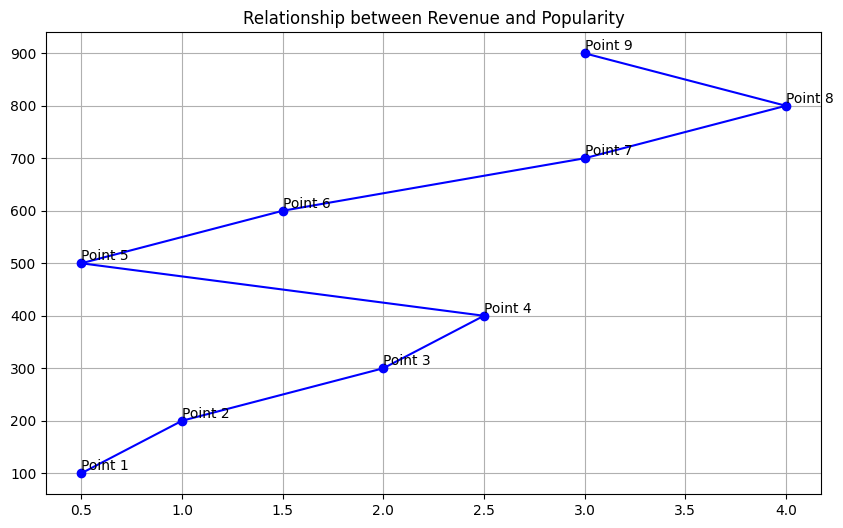

In [123]:
popularity = [100, 200, 300, 400, 500, 600, 700, 800, 900] 
revenue = [0.5, 1.0, 2.0, 2.5, 0.5, 1.5, 3.0, 4.0, 3.0] 

plt.figure(figsize=(10, 6))
plt.plot(revenue, popularity, marker='o',  color='b' )

plt.title('Relationship between Revenue and Popularity')

for i, (x, y) in enumerate(zip(revenue, popularity)):
    plt.text(x, y, f'Point {i+1}', va='bottom')

plt.grid()
plt.show()